In [60]:
# following this tutorial: https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners/data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

median_household_income = pd.read_csv('fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding="windows-1252")
police_killings = pd.read_csv('fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding="windows-1252")

In [15]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [7]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [12]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

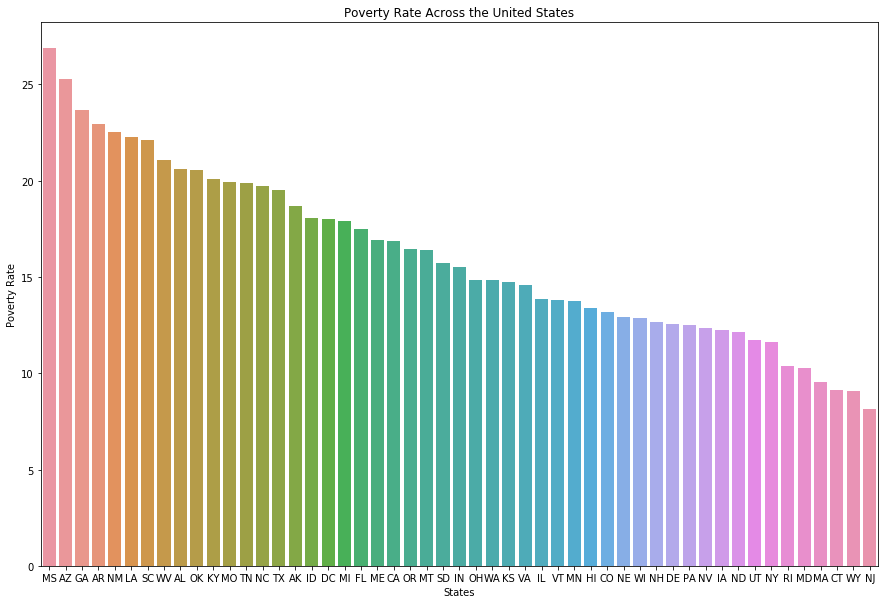

In [37]:
# creating data frame
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0, inplace=True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = list()
for area in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==area]
    area_poverty_rate = sum(x.poverty_rate)/len(x) # mean poverty rate
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area':area_list,'mean_poverty_rate':area_poverty_ratio})
new_index = data.mean_poverty_rate.sort_values(ascending=False).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data.area,y=sorted_data.mean_poverty_rate)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Across the United States')
plt.show()

In [44]:
police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [43]:
police_killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [59]:
police_killings.name.value_counts()
separate = police_killings.name[police_killings.name.str.lower() != 'tk tk'].str.split()
a,b = zip(*separate)
separate

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2529      [Brian, J., Skinner]
2530      [Rodney, E., Jacobs]
2532    [Dennis, W., Robinson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2483, dtype: object